In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

In [217]:
data = pd.read_csv('Air Quality Missing Data.csv')
data

,Date,Ozone,Solar,Wind,Temp
0,01-05-1976,41.0,190.0,7.4,67
1,02-05-1976,36.0,118.0,8.0,72
2,03-05-1976,12.0,149.0,12.6,74
3,04-05-1976,18.0,313.0,11.5,62
4,05-05-1976,NaN,NaN,14.3,56
...,...,...,...,...,...
148,26-09-1976,30.0,193.0,6.9,70
149,27-09-1976,NaN,145.0,13.2,77
150,28-09-1976,14.0,191.0,14.3,75
151,29-09-1976,18.0,131.0,8.0,76


In [218]:
data.isnull().sum()

Date      0
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [219]:
data.dtypes

Date      object
Ozone    float64
Solar    float64
Wind     float64
Temp       int64
dtype: object

In [220]:
data['Ozone'].count()

116

In [221]:
data['Ozone'].describe()

count    116.000000
mean      42.129310
std       32.987885
min        1.000000
25%       18.000000
50%       31.500000
75%       63.250000
max      168.000000
Name: Ozone, dtype: float64

In [222]:
data['Ozone'].median()

31.5

In [223]:
data_1 = data.copy()

In [224]:
# mean = 42, median = 31.5, mode = 23, max = 168, min = 1
## Average of these values are 33.8

data_1['Ozone'] = data['Ozone'].fillna(33.8)

In [225]:
data_1.isna().sum()

Date     0
Ozone    0
Solar    7
Wind     0
Temp     0
dtype: int64

In [226]:
data_2 = data.copy()

In [227]:
imputer = SimpleImputer(strategy=33.8)
# The 'strategy' parameter of SimpleImputer must be a str among {'mean', 'constant', 'most_frequent', 'median'}. Got 33.8 instead
imputer = SimpleImputer(strategy='mean')
data_2['Ozone'] = imputer.fit_transform(data[['Ozone']])

In [228]:
data_2.isnull().sum()

Date     0
Ozone    0
Solar    7
Wind     0
Temp     0
dtype: int64

In [229]:
# Another method
data_3 = data.copy()

In [230]:
data_3['Ozone'] = data['Ozone'].replace(np.nan, 33.8)

In [231]:
data_3.isna().sum()

Date     0
Ozone    0
Solar    7
Wind     0
Temp     0
dtype: int64

In [232]:
data_3['Solar'].count()

146

In [233]:
data_3['Solar'].describe()

count    146.000000
mean     185.931507
std       90.058422
min        7.000000
25%      115.750000
50%      205.000000
75%      258.750000
max      334.000000
Name: Solar, dtype: float64

In [234]:
data_3['Solar'] = imputer.fit_transform(data[['Solar']])

In [235]:
data_3.isna().sum()

Date     0
Ozone    0
Solar    0
Wind     0
Temp     0
dtype: int64

In [236]:
# Visualizing

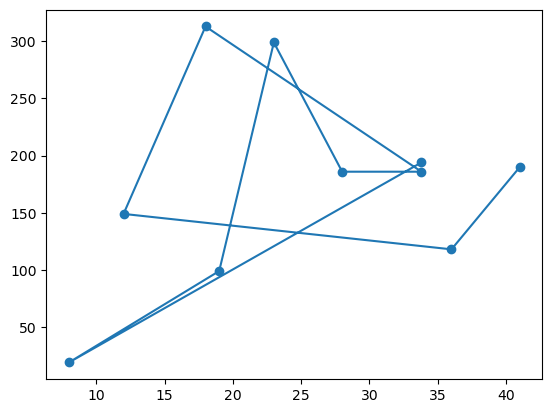

In [237]:
xpoints = data_3['Ozone'][:10]
ypoints = data_3['Solar'][:10]

plt.plot(xpoints, ypoints, marker='o')
plt.show()

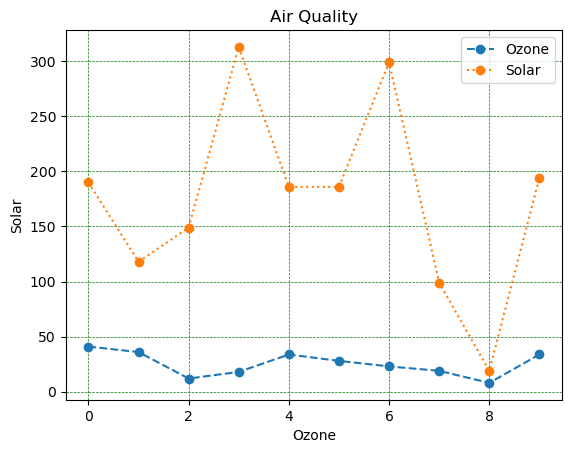

In [238]:
plt.title("Air Quality")
plt.xlabel("Ozone")
plt.ylabel("Solar")
plt.plot(xpoints, linestyle='dashed', marker='o', label='Ozone')
plt.plot(ypoints, linestyle='dotted', marker='o', label='Solar')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

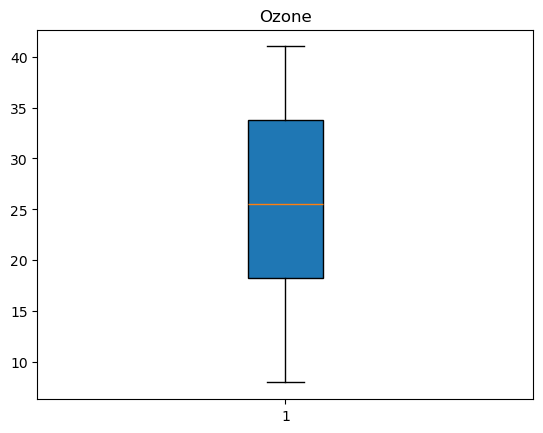

In [239]:
plt.boxplot(xpoints, patch_artist=True)
plt.title('Ozone')
plt.show()

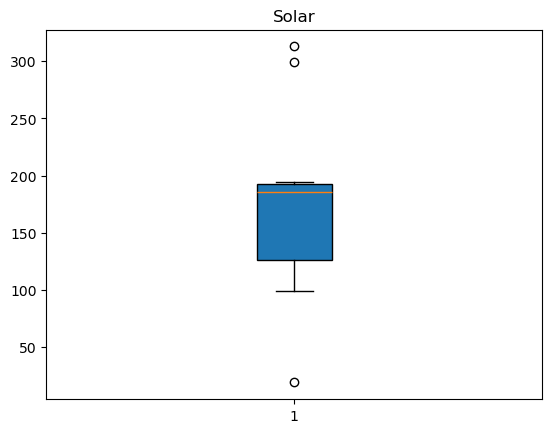

In [240]:
plt.boxplot(ypoints, patch_artist=True)
plt.title('Solar')
plt.show()

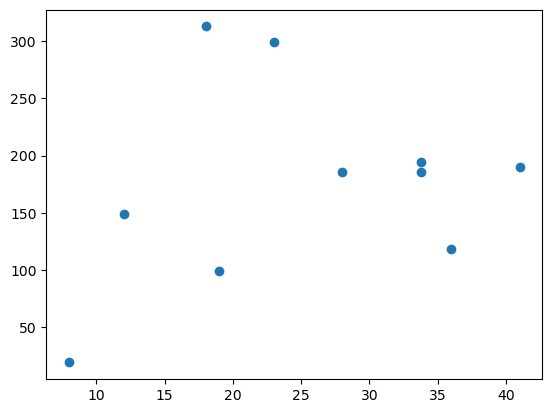

In [241]:
plt.scatter(xpoints, ypoints)
plt.show()

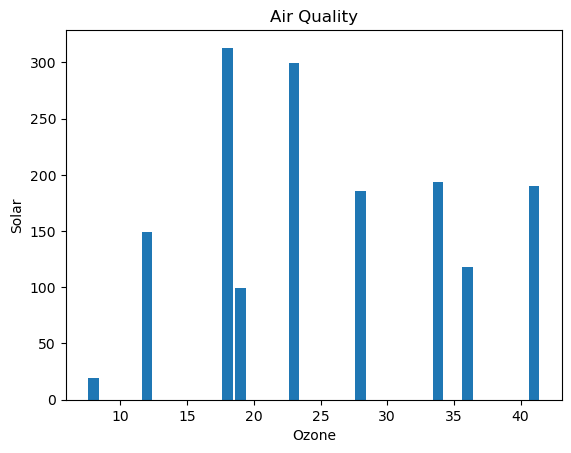

In [242]:
plt.bar(xpoints, ypoints)
plt.xlabel('Ozone')
plt.ylabel('Solar')
plt.title('Air Quality')
plt.show()

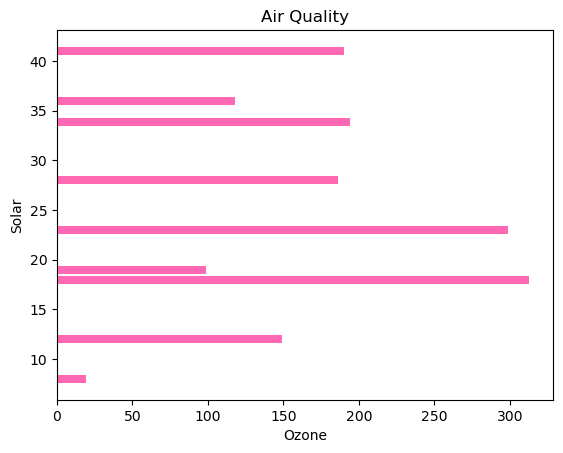

In [243]:
plt.barh(xpoints, ypoints, color = "hotpink")
plt.xlabel('Ozone')
plt.ylabel('Solar')
plt.title('Air Quality')
plt.show()

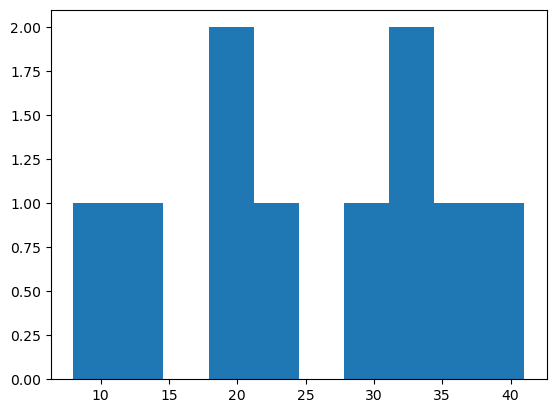

In [244]:
plt.hist(xpoints)
plt.show()

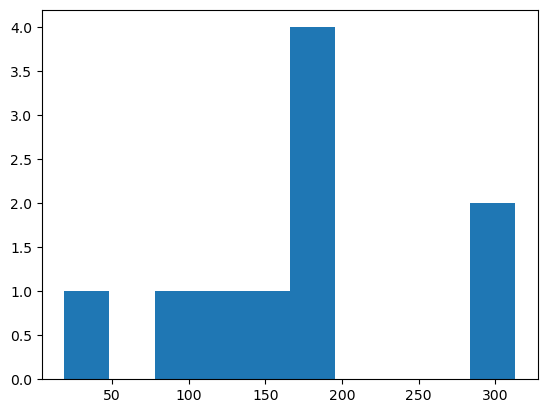

In [245]:
plt.hist(ypoints)
plt.show()

In [246]:
print('median=',xpoints.median()) 
print('mode=',xpoints.mode()) 
xmean = xpoints.mean()
xmedian = xpoints.median()
xmode = xpoints.mode()

median= 25.5
mode= 0    33.8
Name: Ozone, dtype: float64


In [247]:
xpoints.describe()

count    10.000000
mean     25.260000
std      10.990926
min       8.000000
25%      18.250000
50%      25.500000
75%      33.800000
max      41.000000
Name: Ozone, dtype: float64

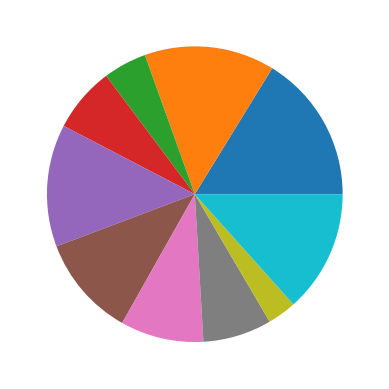

In [248]:
# points = np.array([xmean, xmedian, xmode])
plt.pie(xpoints)
plt.show()

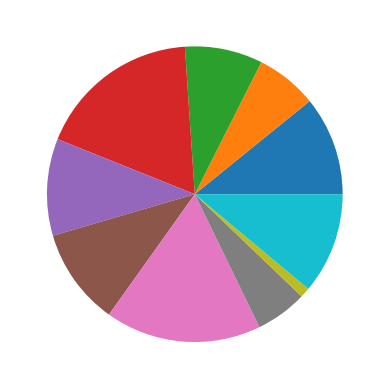

In [249]:
plt.pie(ypoints)
plt.show()

In [250]:
# Visualizing using Seaborn

<Axes: xlabel='Ozone', ylabel='count'>

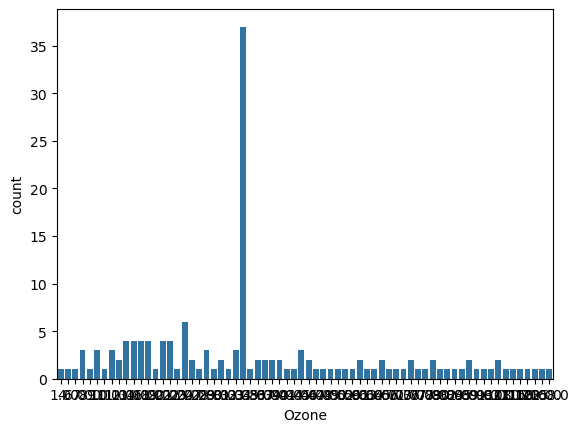

In [251]:
sns.countplot(x='Ozone', data=data_3)

<Axes: xlabel='Ozone', ylabel='Count'>

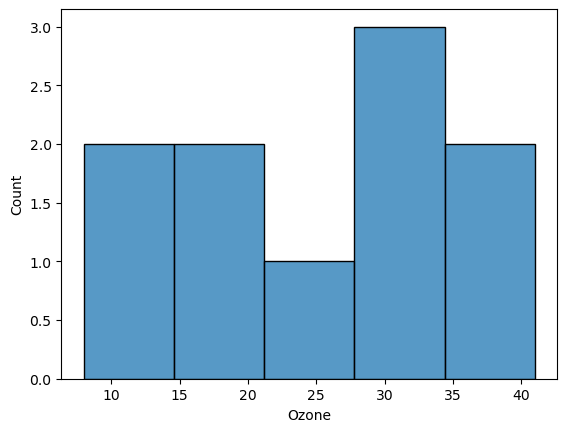

In [252]:
sns.histplot(xpoints)

C:\Users\Samuel Joseph\AppData\Local\Temp\ipykernel_18924\2349805637.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xpoints)


<Axes: xlabel='Ozone', ylabel='Density'>

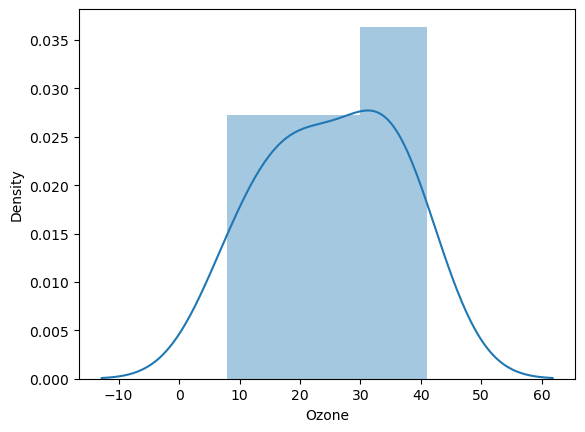

In [253]:
sns.distplot(xpoints)

In [254]:
#stripplot
#swarmplot
#barplot (seaborn)
#boxplot (seaborn)
#violinplot

<Axes: xlabel='Ozone'>

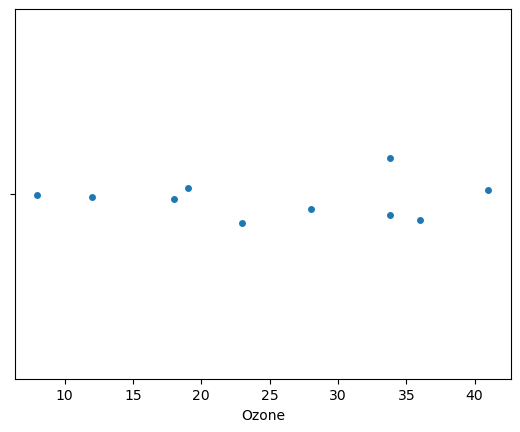

In [255]:
df = pd.DataFrame(xpoints, columns=["Ozone"])
sns.stripplot(data=df, x="Ozone")

<Axes: xlabel='Ozone'>

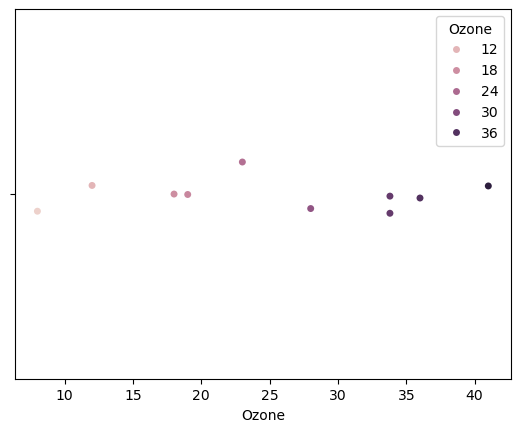

In [256]:
sns.stripplot(data=df, x="Ozone", hue="Ozone", legend=True)

<Axes: xlabel='Ozone'>

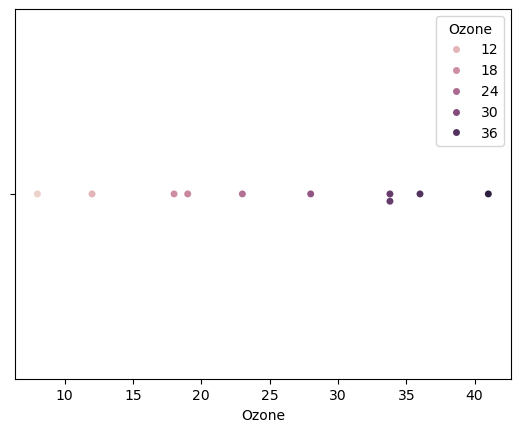

In [257]:
sns.swarmplot(data=df, x="Ozone", hue="Ozone", legend=True)

<Axes: xlabel='Ozone'>

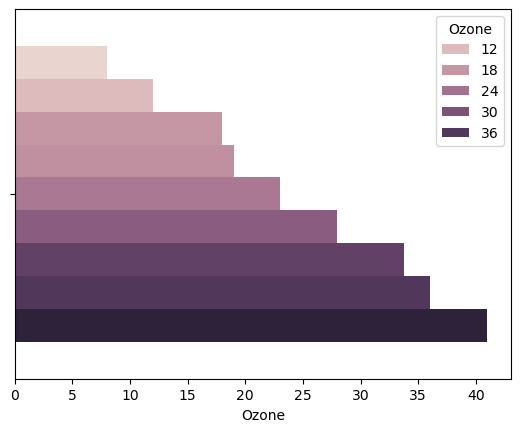

In [258]:
sns.barplot(data=df, x="Ozone", hue="Ozone", legend=True)

<Axes: xlabel='Ozone'>

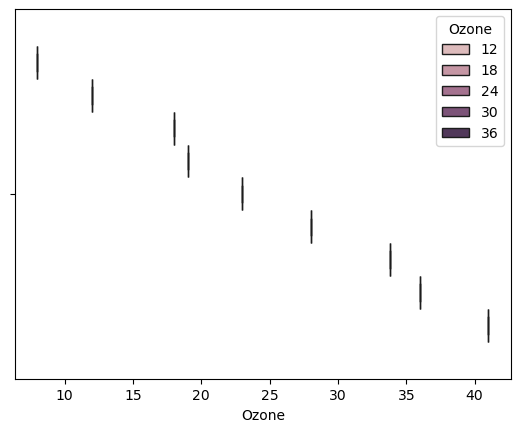

In [259]:
sns.boxplot(data=df, x="Ozone", hue="Ozone", legend=True)

<Axes: xlabel='Ozone'>

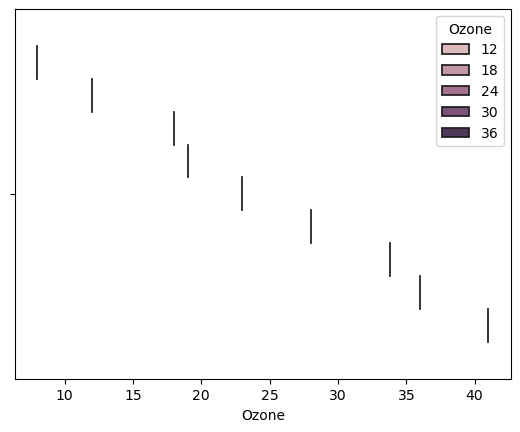

In [260]:
sns.violinplot(data=df, x="Ozone", hue="Ozone", legend=True)

<Axes: ylabel='Ozone'>

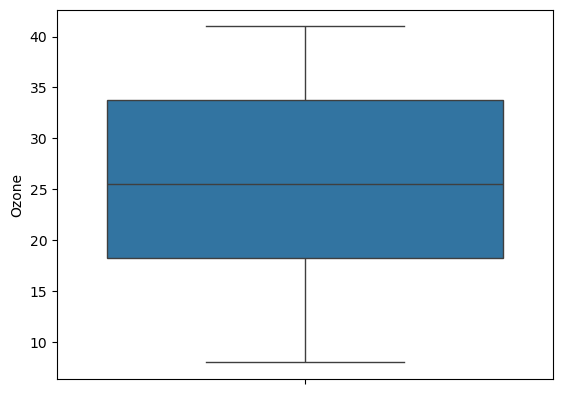

In [261]:
sns.boxplot(xpoints)

<Axes: ylabel='Ozone'>

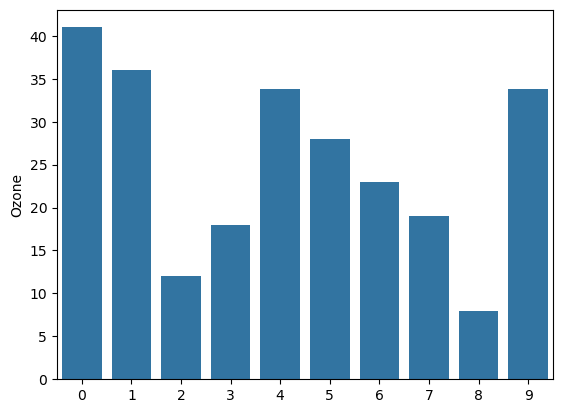

In [262]:
sns.barplot(xpoints)

<Axes: ylabel='Ozone'>

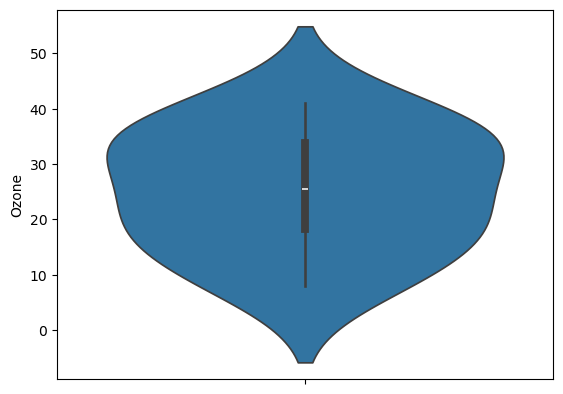

In [263]:
sns.violinplot(xpoints)

In [264]:
# var = sns.stripplot(x="Date", y="Solar", data=df)
# plt.show()

In [265]:
# sns.swarmplot(x='Ozone')

In [266]:
data_4 = data.copy()
data_4.isna().sum()

Date      0
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [267]:
data_4 = data_4.interpolate()

C:\Users\Samuel Joseph\AppData\Local\Temp\ipykernel_18924\3547920501.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_4 = data_4.interpolate()


In [268]:
data_4.isna().sum()

Date     0
Ozone    0
Solar    0
Wind     0
Temp     0
dtype: int64

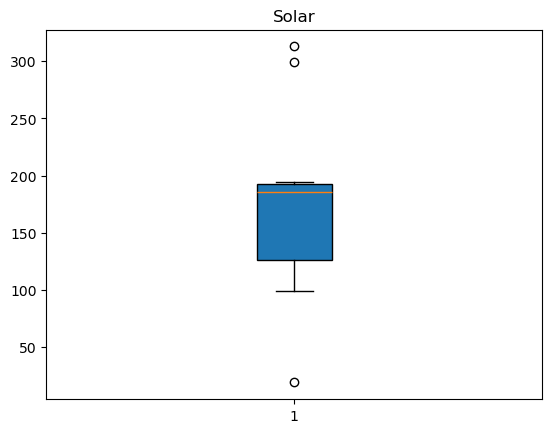

In [269]:
plt.boxplot(ypoints, patch_artist=True)
plt.title('Solar')
plt.show()

In [270]:
df.shape

(10, 1)

In [271]:
df1 = pd.DataFrame(ypoints, columns=['Solar'])
q1 = df1.Solar.quantile(0.25)
q3 = df1.Solar.quantile(0.75)
iqr = q3 - q1
print(f"q1 = {q1}, q3 = {q3}, iqr = {iqr}")

q1 = 125.75, q3 = 193.0, iqr = 67.25


In [272]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
upper_index = np.where(df1['Solar'] >= upper)[0]
# upper_1d = upper_index.reshape([1, 18])
lower_index = np.where(df1['Solar'] <= lower)[0]
print(f"upper index = {upper_index}, lower index = {lower_index}")

upper index = [3 6], lower index = [8]


In [273]:
df1.drop(index=upper_index, inplace=True)
df1.drop(index=lower_index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f27a560a40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f27a560fe0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1f27a5606e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f27a5615b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f27a5618b0>],
 'means': []}

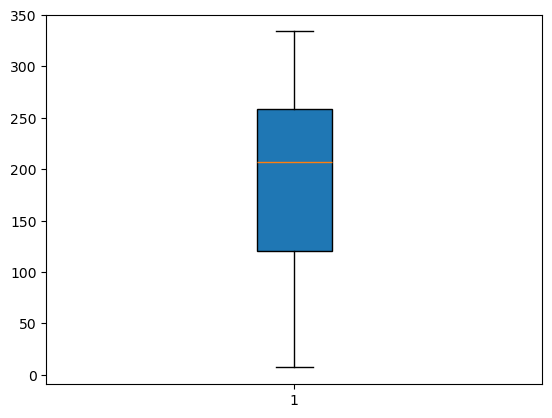

In [278]:
plt.boxplot(data_4['Solar'], patch_artist=True)